In [1]:
import re
import string
import pandas as pd
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

1. Implemente uma função usando expressões regulares que testa se um string representa um CPF no formato correto. Mostre exemplos.

In [2]:
def isCPF(cpf):
  res = re.compile('\d\d\d\.\d\d\d\.\d\d\d\-\d\d').search(cpf)
  if res:
    print('CPF valido')
  else:
    print('CPF invalido')

isCPF('876.234.675-76')
isCPF('8.234.675-76')
isCPF('123.678.837-93')
isCPF('876234.675-76')
isCPF('928.036.826-91')

CPF valido
CPF invalido
CPF valido
CPF invalido
CPF valido


2. Implemente uma função usando expressões regulares que seja capaz, com uma única expressão regular, de extrair rua, número, apartamento (opcionalmente), bairro (opcionalmente), CEP, cidade e estado. Esta função deve ser capaz de funcionar em todos os exemplos abaixo:
• Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.
• Rua da Consolação, 9999, apt 302, Consolação, CEP 11022-202. São Paulo, SP.
• Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.

In [3]:
def getAddress(address):
  pattern = r'(?P<street>(\w*\s*)+), (?P<number>\d*), (?P<ap>\w* \d*, )?(?P<district>\w*, )?(?P<cep>(cep|CEP) \d{5}-\d{3}). (?P<city>(\w*\s*)+), (?P<state>\w\w)'
  res = re.compile(pattern).search(address)
  print(f'string: {address}\nRua: {res.group("street")}\nNumero: {res.group("number")}')
  if res.group('ap'): print(f'Apartamento: {res.group("ap").rstrip(", ")}')
  if res.group('district'): print(f'Bairro: {res.group("district").rstrip(", ")}')
  print(f'CEP: {res.group("cep")}\nCidade: {res.group("city")}\nEstado: {res.group("state")}\n')

getAddress('Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.')
getAddress('Rua da Consolação, 9999, apt 302, Consolação, CEP 11022-202. São Paulo, SP.')
getAddress('Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.')

string: Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.
Rua: Rua José da Silva
Numero: 346
Bairro: Farol
CEP: CEP 57002-220
Cidade: Maceió
Estado: AL

string: Rua da Consolação, 9999, apt 302, Consolação, CEP 11022-202. São Paulo, SP.
Rua: Rua da Consolação
Numero: 9999
Apartamento: apt 302
Bairro: Consolação
CEP: CEP 11022-202
Cidade: São Paulo
Estado: SP

string: Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.
Rua: Avenida Atlântica
Numero: 420
Apartamento: ap 1001
Bairro: Copacabana
CEP: cep 22011-010
Cidade: Rio de Janeiro
Estado: RJ



3. Implemente uma função usando expressões regulares que encontre todas as URLs em um string. Mostre exemplos.

In [4]:
def findURLs(data):
  pattern = r'https?://[\w*.]+'
  res = re.compile(pattern).findall(data)
  print(res)

findURLs('Lorem ipsum dolor sit amet, https://www.lipsum.com/feed/html consectetur adipiscing elit. Nulla facilisis nisl et sagittis cursus. Morbi euismod nisl sit amet accumsan http://www.google.com aliquam. Nullam vehicula nisi nibh, at faucibus massa fringilla eu. Sed cursus pretium iaculis. Etiam fermentum, mauris mollis volutpat commodo, orci lectus congue libero, sit amet finibus nunc lacus ac ante. Vivamus posuere id mi ac placerat. Proin mollis vulputate erat, ac efficitur eros. ')

['https://www.lipsum.com', 'http://www.google.com']


4. Considere o seguinte exemplo de referência de livro em formato de citação APA:

Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.

Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência
de livro neste formato.

In [5]:
def reference(data):
  pattern = r'(?P<authors>[\w\s\.\,\&]+) (?P<year>\(\d+\)). (?P<title>(\w*\s*)+). (?P<company>(\w*\s*)+).'
  for x in re.compile(pattern).finditer(data):

    temp = re.compile(r'\w+,\s[A-Z. ]+').findall(x.group('authors'))
    print('Autores:', temp)
    print(f'Ano de publicação: {x.group("year")}')
    print(f'Título: {x.group("title")}')
    print(f'Editora do livro: {x.group("company")}\n')

reference('Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.')

Autores: ['Manning, C. D.', 'Manning, C. D.', 'Schutze, H.']
Ano de publicação: (1999)
Título: Foundations of statistical natural language processing
Editora do livro: MIT press



5. Implemente uma função usando expressões regulares que encontre e substitua todas as datas em formato dd/mm/yyyy por mm-dd-yy. Mostre exemplos.

In [6]:
def find_replace(data):
  print(re.sub(r'(\d{2})/(\d{2})/(\d{4})', r'\2-\1-\3', data))

find_replace('teste 12/05/2004 teste')
find_replace('teste 23/11/1287 ')

teste 05-12-2004 teste
teste 11-23-1287 


6. Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.

In [7]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
ch_sizes = [len(x) for x in df['text']]
ch_sizes

[1101,
 1571,
 134,
 295,
 180,
 709,
 79,
 152,
 122,
 209,
 302,
 197,
 298,
 131,
 96,
 525,
 125,
 377,
 51,
 221,
 180,
 454,
 2,
 51,
 93,
 138,
 60,
 4,
 315,
 1095,
 175,
 450,
 156,
 19,
 34,
 986,
 126,
 259,
 137,
 195,
 305,
 341,
 351,
 58,
 88,
 260,
 66,
 53,
 492,
 31,
 1132,
 204,
 266,
 372,
 342,
 71,
 207,
 278,
 81,
 364,
 96,
 1419,
 344,
 635,
 124,
 351,
 175,
 1209,
 1250,
 695,
 271,
 85,
 116,
 256,
 1106,
 204,
 99,
 532,
 146,
 393,
 125,
 195,
 399,
 192,
 1422,
 268,
 183,
 171,
 144,
 47,
 571,
 181,
 341,
 190,
 325,
 59,
 168,
 55,
 1895,
 272,
 1987,
 876,
 399,
 133,
 284,
 86,
 199,
 214,
 45,
 533,
 197,
 143,
 1087,
 249,
 249,
 908,
 146,
 366,
 237,
 92,
 1024,
 657,
 92,
 359,
 82,
 128,
 325,
 451,
 264,
 327,
 877,
 136,
 177,
 119,
 1158,
 230,
 51,
 46,
 213,
 350,
 246,
 751,
 295,
 330,
 37,
 376,
 63,
 619,
 106,
 64,
 102,
 30,
 37,
 1861,
 194,
 205,
 319,
 207,
 87,
 115,
 284,
 292,
 201,
 283,
 2739,
 274,
 181,
 491,
 707,
 447,
 1

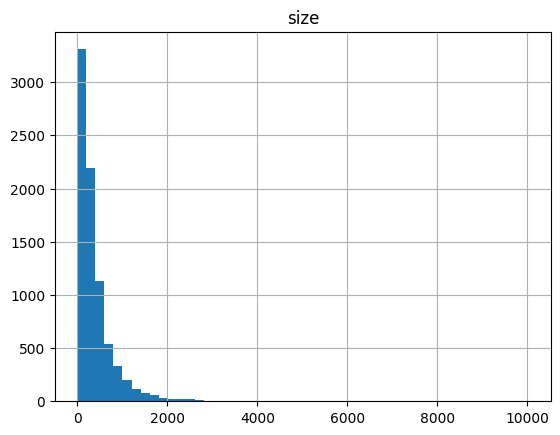

In [8]:
df = pd.DataFrame({
    'size': ch_sizes,
})
hist = df.hist(bins=50)

7. Aplique os seguintes passos de pré-processamento aos textos:
• Remova todas as palavras que contêm números;
• Converta as palavras para minúsculas;
• Remova pontuação;
• Tokenize os textos em palavras, gerando um dicionário único com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras.
Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [9]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
# remove html symbols
df['text'] = df['text'].apply(lambda row: re.sub('\<[^>]*\>', ' ', row))
df['text'] = df['text'].apply(lambda row: re.sub('\&[^;]*\;', ' ', row))
print(df['text'][0])

df['text'] = df['text'].apply(lambda row: re.sub('\d', '', row).lower())
df['text'] = df['text'].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
df['tokenized'] = df['text'].apply(lambda row: nltk.word_tokenize(row))

print('\n')
print(df['text'][0])

  which leads me to say why are you using C to do X?  Because they know C it s fast and it has lots of libs available. They might also dislike Java or CL. Not every engineering decision is perfect lots of factors play in.   Attempts to combine the best of C (speed) with the best of scripting languages (easy to do things fast without having to pay attention to what you are doing) in my opinion end up merely joining the worst of both worlds rather than the best of both worlds.  The  pay attention  things is to needless complexity (memory management etc). They only reason we put up with those things was to get speed. If we can get adequate speed without those nobody cares about them.   Besides isn t programming about being specific? Do you really want to code stuff without having to worry about the details?  No programming is about getting results. Nobody cares about the details in the level of programming language minutuae. We care about the  effort put in  and  quality speed of results 

In [10]:
all_words = [y for x in df['tokenized'] for y in x]
freq = nltk.FreqDist(all_words)
freq

FreqDist({'the': 21285, 'to': 14948, 'a': 13000, 'of': 10596, 'and': 10224, 'i': 9224, 'that': 8611, 'is': 8434, 'it': 7875, 'in': 7034, ...})

In [11]:
for i, (word, f) in enumerate(freq.most_common(10)):
    if i == 10: break
    print(f'word: {word}  |  frequency: {f}')

word: the  |  frequency: 21285
word: to  |  frequency: 14948
word: a  |  frequency: 13000
word: of  |  frequency: 10596
word: and  |  frequency: 10224
word: i  |  frequency: 9224
word: that  |  frequency: 8611
word: is  |  frequency: 8434
word: it  |  frequency: 7875
word: in  |  frequency: 7034


8. Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:

• Remova stopwords;
• Realize rotulação de POS;
• Realize stemização;

a) Exiba os resultados em alguns textos.
b) Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.
c) Repita a letra b) usando os tokens stemizados.
d) Verifique quais são as classes gramaticais mais frequentes.

In [12]:
stop_words = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.PorterStemmer()
print(df['text'][0])
df['text2'] = df['text'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['text2'] = df['text2'].apply(lambda row: [stemmer.stem(x) for x in row])
df['text2'] = df['text2'].apply(lambda row: nltk.pos_tag(row))

' '.join([x[0] for x in df['text2'][0]])

  which leads me to say why are you using c to do x  because they know c it s fast and it has lots of libs available they might also dislike java or cl not every engineering decision is perfect lots of factors play in   attempts to combine the best of c speed with the best of scripting languages easy to do things fast without having to pay attention to what you are doing in my opinion end up merely joining the worst of both worlds rather than the best of both worlds  the  pay attention  things is to needless complexity memory management etc they only reason we put up with those things was to get speed if we can get adequate speed without those nobody cares about them   besides isn t programming about being specific do you really want to code stuff without having to worry about the details  no programming is about getting results nobody cares about the details in the level of programming language minutuae we care about the  effort put in  and  quality speed of results coming out  ratio


'lead say use c x know c fast lot lib avail might also dislik java cl everi engin decis perfect lot factor play attempt combin best c speed best script languag easi thing fast without pay attent opinion end mere join worst world rather best world pay attent thing needless complex memori manag etc reason put thing get speed get adequ speed without nobodi care besid program specif realli want code stuff without worri detail program get result nobodi care detail level program languag minutua care effort put qualiti speed result come ratio'

In [13]:
all_words = [y for x in df['tokenized'] for y in x]
freq = nltk.FreqDist(all_words)

all_words2 = [y for x in df['text2'] for y in x]
freq2 = nltk.FreqDist(all_words2)

for i, (word, f) in enumerate(freq.most_common(10)):
    if i == 10: break
    print(f'word: {word}  |  frequency: {f} ### word2: {freq2.most_common(10)[i][0]}  |  frequency2: {freq2.most_common(10)[i][1]}')

word: the  |  frequency: 21285 ### word2: ('like', 'IN')  |  frequency2: 2024
word: to  |  frequency: 14948 ### word2: ('use', 'NN')  |  frequency2: 1786
word: a  |  frequency: 13000 ### word2: ('would', 'MD')  |  frequency2: 1657
word: of  |  frequency: 10596 ### word2: ('one', 'CD')  |  frequency2: 1524
word: and  |  frequency: 10224 ### word2: ('work', 'NN')  |  frequency2: 1423
word: i  |  frequency: 9224 ### word2: ('time', 'NN')  |  frequency2: 1204
word: that  |  frequency: 8611 ### word2: ('peopl', 'NN')  |  frequency2: 1146
word: is  |  frequency: 8434 ### word2: ('thing', 'NN')  |  frequency2: 1109
word: it  |  frequency: 7875 ### word2: ('also', 'RB')  |  frequency2: 955
word: in  |  frequency: 7034 ### word2: ('make', 'VBP')  |  frequency2: 948


In [14]:
pos_freq = nltk.FreqDist(t for w, t in all_words2)

for i, (pos, f) in enumerate(pos_freq.most_common(10)):
    if i == 10: break
    print(f'pos: {pos}  |  frequency: {f}')

pos: NN  |  frequency: 139482
pos: JJ  |  frequency: 49613
pos: VBP  |  frequency: 15343
pos: RB  |  frequency: 11082
pos: VB  |  frequency: 10312
pos: IN  |  frequency: 6839
pos: NNS  |  frequency: 5904
pos: VBD  |  frequency: 4599
pos: MD  |  frequency: 3662
pos: CD  |  frequency: 2398
